In [1]:
import geojson
import pandas as pd
import numpy as np
from scipy.spatial import KDTree
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# Download MS Building Footprints for Vermont:

In [2]:
# !wget https://usbuildingdata.blob.core.windows.net/usbuildings-v2/Vermont.geojson.zip
# !unzip Vermont.geojson.zip

# Read Building Footprints with geojson

In [3]:
%%time
with open('Vermont.geojson') as f:
    gj = geojson.load(f)
    
len(gj['features'])

Wall time: 15.7 s


351266

# Computer all centroids

In [4]:
%%time
centroids = [np.array(f['geometry']['coordinates'])[0].mean(axis=0) for f in gj['features']]
centroids = np.array(centroids)
centroids.shape

Wall time: 4.69 s


(351266, 2)

# Build sptial index for all centroids using KDTree

In [5]:
kd_tree = KDTree(centroids)

# Query KDTree with a test address

In [6]:
# lat/long for an arbitary address: 15 Library St, South Pomfret, VT 05067
pos = [-72.53926875, 43.6651301]

dist, idx = kd_tree.query(pos)
dist, idx

(1.0588319031297122e-05, 147796)

# Visualize query results

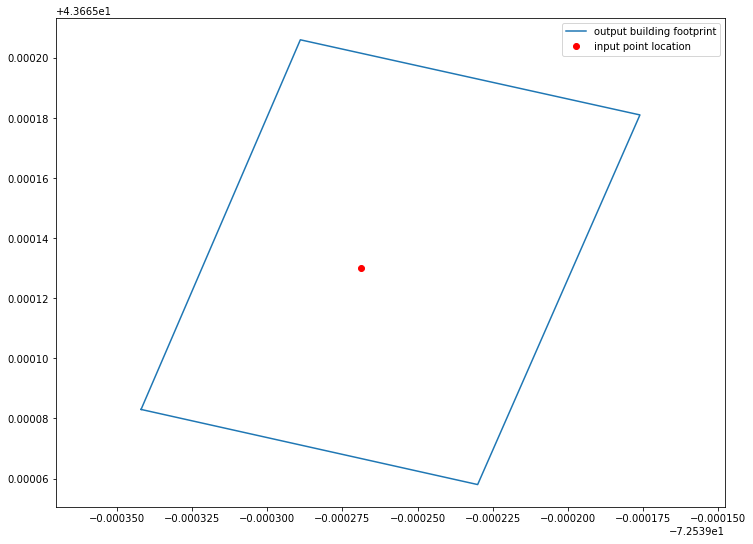

In [7]:
poly = gj['features'][idx]['geometry']['coordinates'][0]

x = [v[0] for v in poly]
y = [v[1] for v in poly]

plt.subplots(figsize=(12, 9))
plt.plot(x, y, label='output building footprint')
plt.plot(pos[0], pos[1], 'ro', label='input point location')
plt.axis('equal')
plt.legend()
plt.show()

# Check whether point is inside polygon with shapely

In [8]:
poly = Polygon(poly)
point = Point(pos)
poly.contains(point)

True